In [1]:
import pandas as pd

import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale





**Load The Data**

In [2]:
df = pd.read_csv('housing_data_cleaned.csv')

In [3]:
df.head()

,Unnamed: 0,Zip_Code,Dwelling_Type,Nr_Bedrooms,Nr_Bathrooms,Approx_SQFT,Price_per_SqFt,Dwelling_Styles,Year_Built,Approx_Lot_SqFt,...,Gated_Community,Workout_Facility,Garage_Spaces,Carport_Spaces,Loan_Type,Payment_Type,HOA_Missing,Buyer_Concession,Seller_Concession,diff_List_Sold
0,0,85003,AF,1,1.0,720,340.28,Stacked,1964,652,...,Yes,Yes,0.0,1.0,Conventional,Fixed,0,0.0,7410.00,-2000
1,1,85003,LS,1,1.0,755,430.46,Stacked,2005,751,...,Yes,Yes,0.0,0.0,VA,Fixed,0,0.0,0.00,-10000
2,2,85003,SF,4,3.0,3415,439.23,Detached,1940,11696,...,Yes,Yes,2.0,0.0,Conventional,Fixed,0,0.0,0.00,-95000
3,3,85003,AF,1,1.0,710,436.61,Stacked,2005,0,...,Yes,Yes,0.0,0.0,Conventional,Adjustable,0,0.0,6000.00,-5000
4,4,85003,AF,2,2.5,1510,314.56,Stacked,2007,654,...,No,Yes,2.0,0.0,Conventional,Fixed,0,0.0,17621.25,5100


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3117 entries, 0 to 3116
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          3117 non-null   int64  
 1   Zip_Code            3117 non-null   int64  
 2   Dwelling_Type       3117 non-null   object 
 3   Nr_Bedrooms         3117 non-null   int64  
 4   Nr_Bathrooms        3117 non-null   float64
 5   Approx_SQFT         3117 non-null   int64  
 6   Price_per_SqFt      3117 non-null   float64
 7   Dwelling_Styles     3117 non-null   object 
 8   Year_Built          3117 non-null   int64  
 9   Approx_Lot_SqFt     3117 non-null   int64  
 10  Pool                3117 non-null   object 
 11  HOA_Fee             2200 non-null   float64
 12  Land_Lease_Fee      3117 non-null   object 
 13  Clubhouse_Rec_Room  3117 non-null   object 
 14  Basement            3117 non-null   object 
 15  RV_Gate             3117 non-null   object 
 16  List_P

In [5]:
df['Zip_Code'] = df['Zip_Code'].astype(str)  # zipcodes are categorical values

In [6]:
# Most of real estate sales are SF-Single-Family type followed by TH-Town homes, AF-apartment/flat style, 
# MM-Manufactured/Mobile homes, PH-patio homes, LS-Loft style, GT-Gemini/Twin homes, and MD-Modular/prefab homes.

df['Dwelling_Type'].value_counts()

Dwelling_Type
SF    2308
TH     330
AF     239
MM     177
PH      56
LS       3
GT       3
MD       1
Name: count, dtype: int64

## Exploring the data - visualizing features distributions

In [7]:
agg_functions = {'Sold_Price': ['min','mean','max', 'count']}
df_info = df.groupby(['Sold_Price','Zip_Code']).agg(agg_functions)
df_info

Sold_Price                            
                           min        mean       max count
Sold_Price Zip_Code                                       
10000      85120         10000     10000.0     10000     1
14500      85204         14500     14500.0     14500     1
18000      85207         18000     18000.0     18000     1
20000      85207         20000     20000.0     20000     1
21000      85225         21000     21000.0     21000     1
...                        ...         ...       ...   ...
5800000    85018       5800000   5800000.0   5800000     1
6295000    85377       6295000   6295000.0   6295000     1
7626000    85016       7626000   7626000.0   7626000     1
9391112    85253       9391112   9391112.0   9391112     1
10364000   85018      10364000  10364000.0  10364000     1

[2838 rows x 4 columns]

In [8]:
df_zipcode = df[['Zip_Code','Sold_Price','Price_per_SqFt', 'Dwelling_Type']]

df_zipcode.sort_values(by='Sold_Price')


,Zip_Code,Sold_Price,Price_per_SqFt,Dwelling_Type
1203,85120,10000,16.42,MM
1435,85204,14500,14.16,MM
1582,85207,18000,45.00,MM
1633,85207,20000,25.51,MM
1987,85225,21000,21.42,MM
...,...,...,...,...
219,85018,5800000,1052.63,SF
2946,85377,6295000,1165.74,SF
148,85016,7626000,1002.10,SF
2332,85253,9391112,1381.05,SF


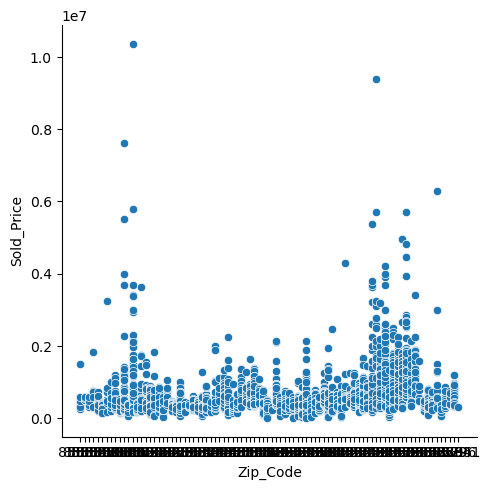

In [9]:
sns.relplot(x=df_zipcode['Zip_Code'], y = df_zipcode['Sold_Price'], kind = 'scatter')
plt.show()

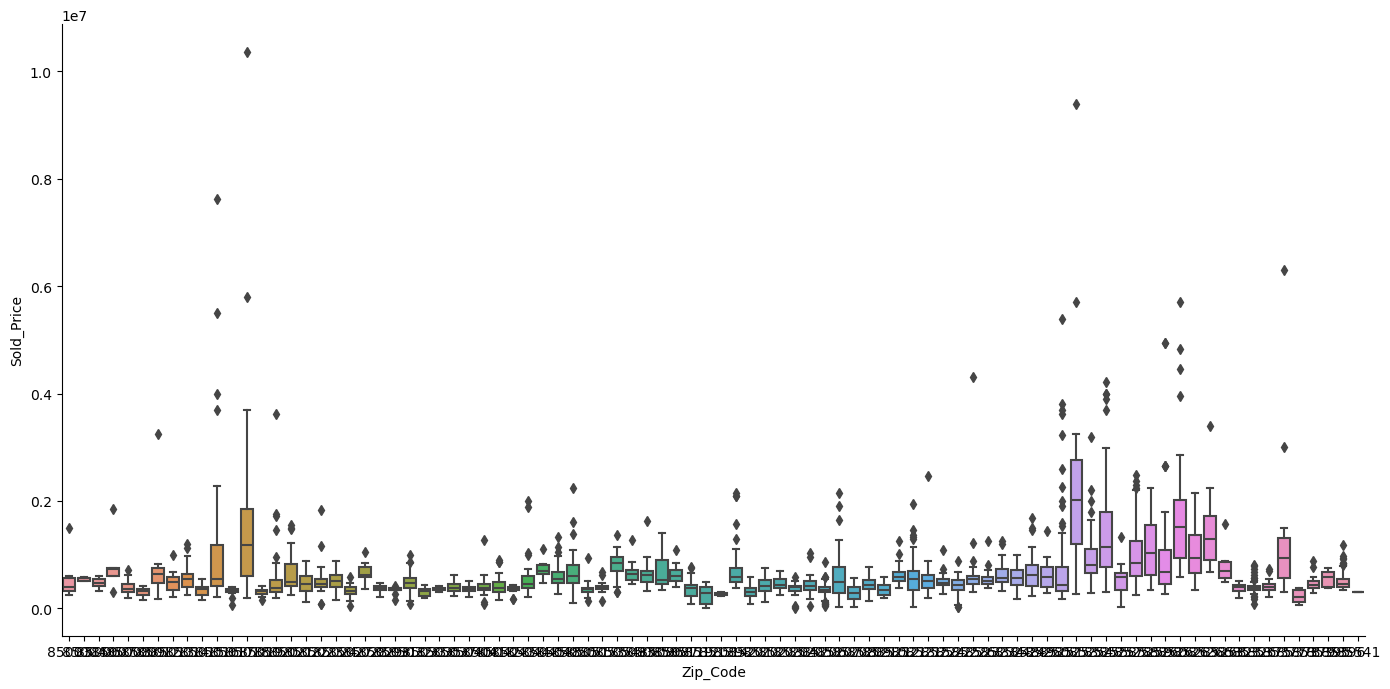

In [10]:
g = sns.catplot(x = 'Zip_Code', y = 'Sold_Price', 
               data = df_zipcode,
               kind = 'box', height=7, aspect=2)

plt.show()

In [11]:
# zipcode 85326 has most properties sold in March 2024

df['Zip_Code'].value_counts()

Zip_Code
85326    123
85142     98
85396     92
85207     83
85251     80
        ... 
85004      6
85003      6
85007      5
85139      2
85541      1
Name: count, Length: 88, dtype: int64

In [12]:
df['Sold_Price'].describe()
    

count    3.117000e+03
mean     6.352639e+05
std      6.138111e+05
min      1.000000e+04
25%      3.600000e+05
50%      4.750000e+05
75%      6.808880e+05
max      1.036400e+07
Name: Sold_Price, dtype: float64

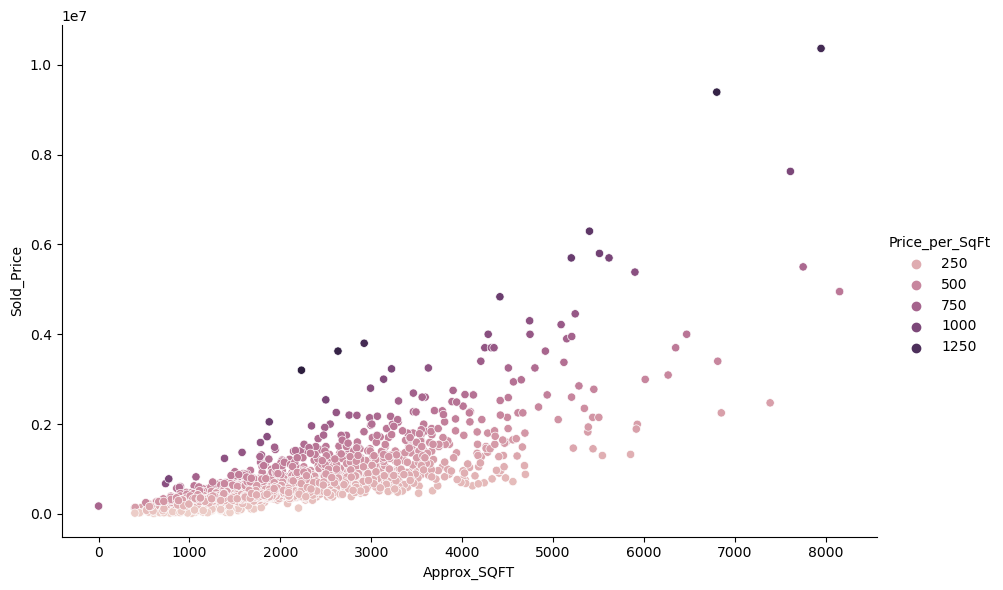

In [13]:
sns.relplot(x='Approx_SQFT', y='Sold_Price', data=df, kind='scatter', hue='Price_per_SqFt', height=6, aspect=1.5)
plt.show()

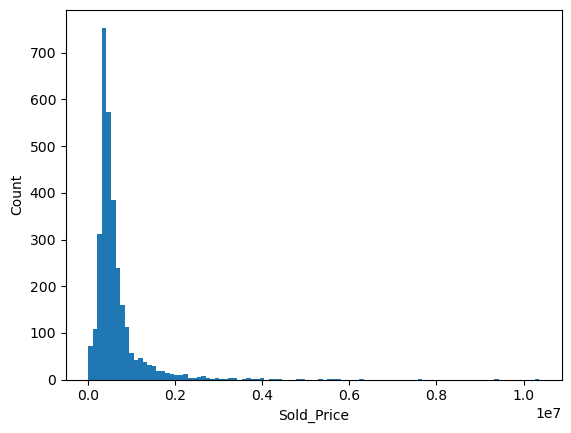

In [14]:
# Sold prices display a right skewed histogram, also called a positively skewed histogram, which challenges the assumption
# of normality. Logarithmic transformation  should be used to minimize the impact of extreme values

_ = plt.hist(df['Sold_Price'], bins=100)
_ = plt.xlabel('Sold_Price')
_=plt.ylabel('Count')
plt.show()

In [15]:
# adding a column "Sold_Price_log" to df containing np.log('Sold_Price')

df['Sold_Price_log'] = np.log(df['Sold_Price'])

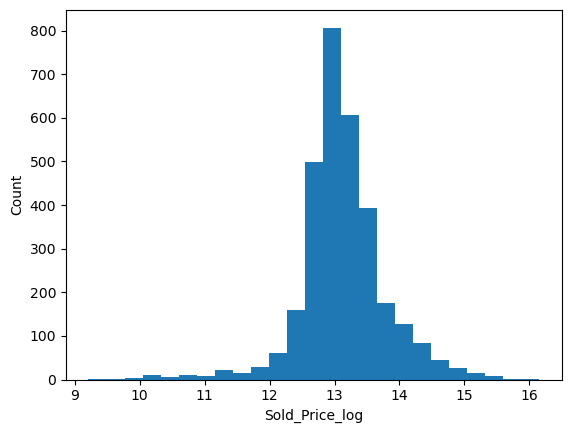

In [16]:
# Sold_Price is now normally distributed
_ = plt.hist(df['Sold_Price_log'], bins=25)
_ = plt.xlabel('Sold_Price_log')
_=plt.ylabel('Count')
plt.show()

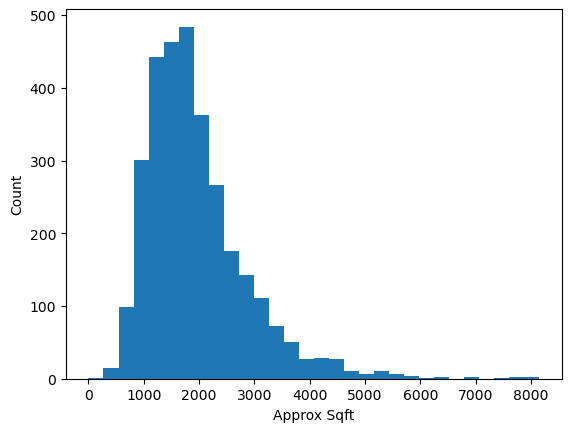

In [17]:
# Approx_SQFT displays a right skewed histogram, also called a positively skewed histogram, which challenges the assumption
# of normality. Logarithmic transformation  should be used to minimize the impact of extreme values

_ = plt.hist(df['Approx_SQFT'], bins=30)
_ = plt.xlabel('Approx Sqft')
_=plt.ylabel('Count')
plt.show()

In [18]:
# adding a column "Approx_SQFT_log" to df containing np.log('Approx_SQFT')

df['Approx_SQFT_log'] = np.log(df['Approx_SQFT'])

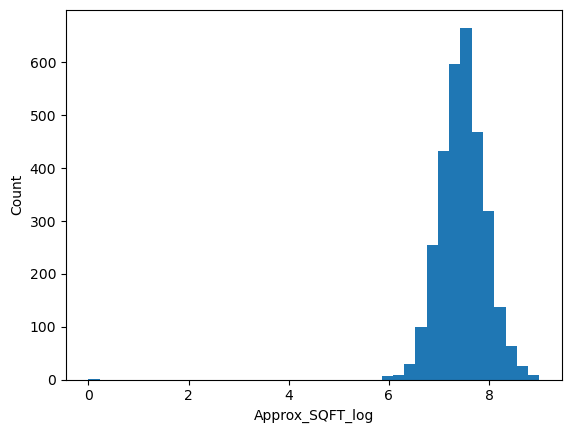

In [19]:
# Approc_SQFT_log is now normally distributed
_ = plt.hist(df['Approx_SQFT_log'], bins=40)
_ = plt.xlabel('Approx_SQFT_log')
_=plt.ylabel('Count')
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3117 entries, 0 to 3116
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          3117 non-null   int64  
 1   Zip_Code            3117 non-null   object 
 2   Dwelling_Type       3117 non-null   object 
 3   Nr_Bedrooms         3117 non-null   int64  
 4   Nr_Bathrooms        3117 non-null   float64
 5   Approx_SQFT         3117 non-null   int64  
 6   Price_per_SqFt      3117 non-null   float64
 7   Dwelling_Styles     3117 non-null   object 
 8   Year_Built          3117 non-null   int64  
 9   Approx_Lot_SqFt     3117 non-null   int64  
 10  Pool                3117 non-null   object 
 11  HOA_Fee             2200 non-null   float64
 12  Land_Lease_Fee      3117 non-null   object 
 13  Clubhouse_Rec_Room  3117 non-null   object 
 14  Basement            3117 non-null   object 
 15  RV_Gate             3117 non-null   object 
 16  List_P

In [21]:
# filter df for rows where Sold_Price is between $400,000 and $600,000 and groupby zipcode, Approx_SQFT and Price_per_SqFt

df[(df.Sold_Price < 600000) & (df.Sold_Price > 400000)].groupby('Zip_Code')[['Sold_Price', 'Approx_SQFT','Price_per_SqFt']].value_counts()

Zip_Code  Sold_Price  Approx_SQFT  Price_per_SqFt
85003     475000      1510         314.56            1
85004     505000      1456         346.84            2
          575000      1624         354.06            2
          557000      1463         380.72            2
85006     410000      1170         350.42            1
                                                    ..
85396     440000      1854         237.32            1
                      2207         199.36            1
                      2658         165.53            1
          449250      1858         241.79            1
          589990      2835         208.11            1
Name: count, Length: 970, dtype: int64

In [22]:
# filter df for rows where Sold_Price is greater than 2000000 and groupby zipcodeApprox_SQFT and Price_per_SqFt

df[(df.Sold_Price > 2000000)].groupby('Zip_Code')[['Sold_Price', 'Approx_SQFT','Price_per_SqFt']].value_counts()

Zip_Code  Sold_Price  Approx_SQFT  Price_per_SqFt
85012     3250000     4508         720.94            1
85016     2274500     3463         656.80            1
          7626000     7610         1002.10           1
          5500000     7750         709.67            1
          4000000     4286         933.27            1
                                                    ..
85263     2150000     5503         390.70            1
85266     3400000     6811         499.19            1
          2250000     4667         482.10            1
85377     3000000     3136         956.63            1
          6295000     5400         1165.74           1
Name: count, Length: 88, dtype: int64

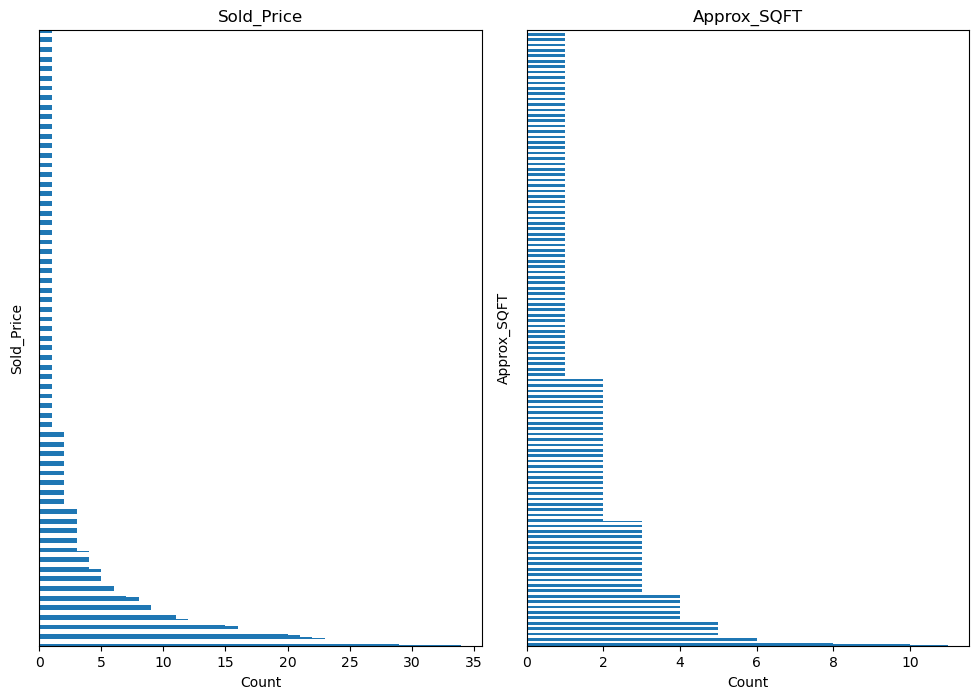

In [23]:


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

df.Sold_Price.value_counts().plot(kind='barh', ax=ax[0])

ax[0].set_title('Sold_Price')

ax[0].set_xlabel('Count')

ax[0].set(yticklabels=[])

ax[0].tick_params(left=False)

df.Approx_SQFT.value_counts().plot(kind='barh', ax=ax[1])

ax[1].set_title('Approx_SQFT')

ax[1].set_xlabel('Count')

ax[1].set(yticklabels=[])

ax[1].tick_params(left=False)

plt.subplots_adjust(wspace=0.1);


In [24]:
# Get mean Sold_Price and Approx_SQFT by zipcode

zipcode_means = df.groupby('Zip_Code')[['Sold_Price', 'Approx_SQFT']].mean()
zipcode_means

,Sold_Price,Approx_SQFT
Zip_Code,,
85003,575833.333333,1333.833333
85004,545666.666667,1514.333333
85006,464755.555556,1344.777778
85007,848600.000000,2126.600000
85008,388708.695652,1339.869565
...,...,...
85378,226214.285714,1086.071429
85379,456703.173077,2046.250000
85395,545714.285714,2195.285714


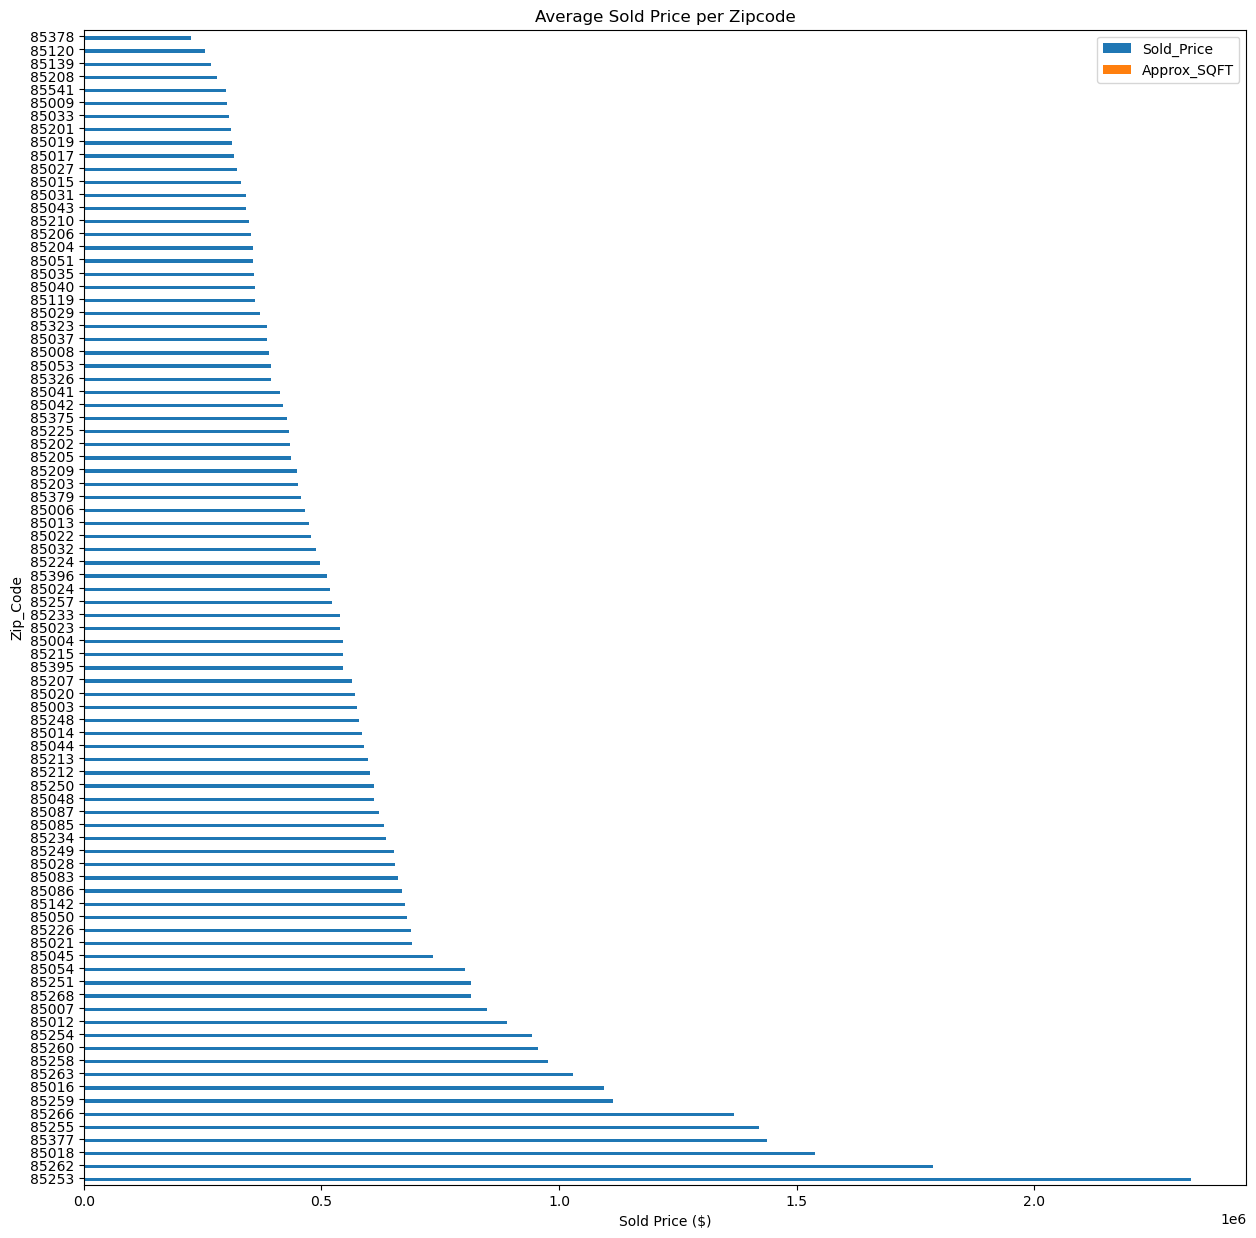

In [25]:
#  I need help to get Approx_SQFT displayed on a different scale, please. Approx_SQFT should show too

(zipcode_means.reindex(index=zipcode_means.mean(axis=1)
                          .sort_values(ascending=False)
                          .index)
                          .plot(kind='barh', figsize=(15, 15), title='Average Sold Price per Zipcode'))
plt.xlabel('Sold Price ($)');

In [27]:
zipcode_price_means

NameError: name 'zipcode_price_means' is not defined

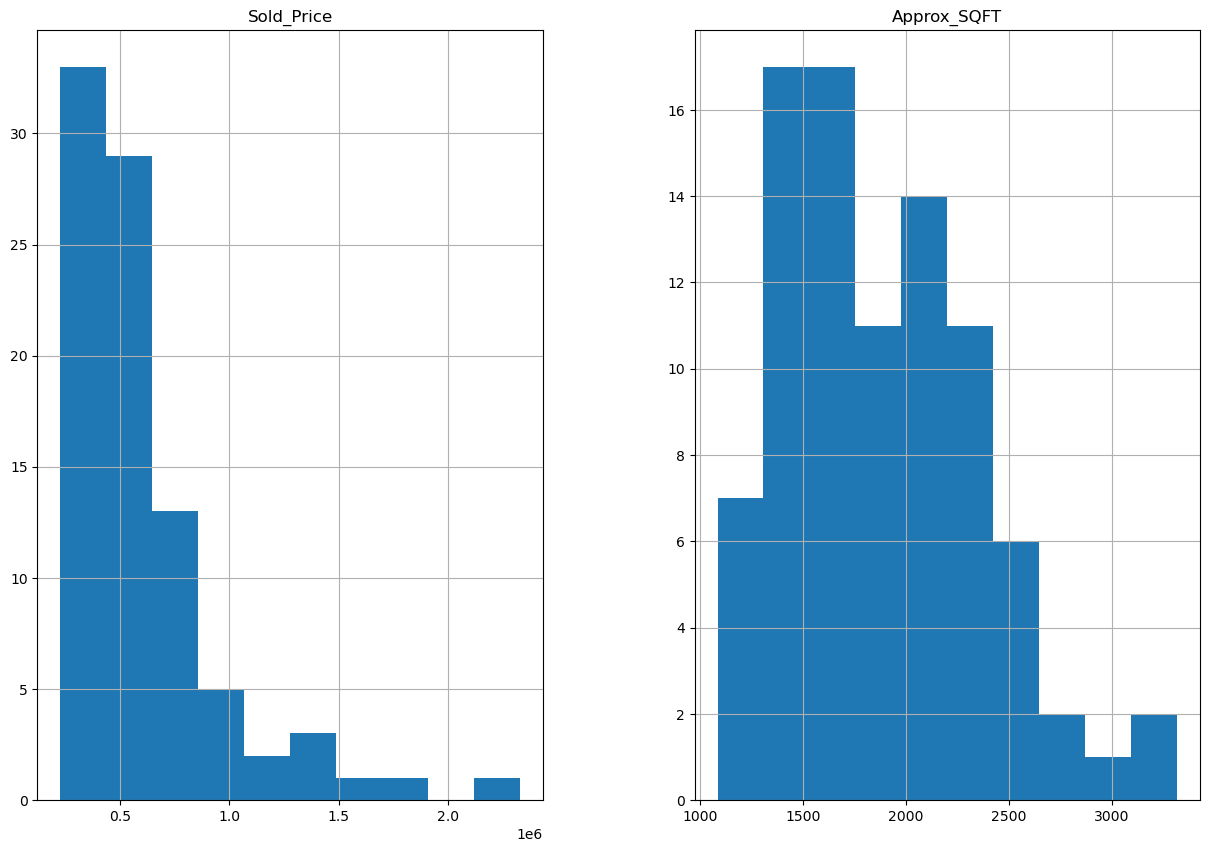

In [28]:
zipcode_means.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

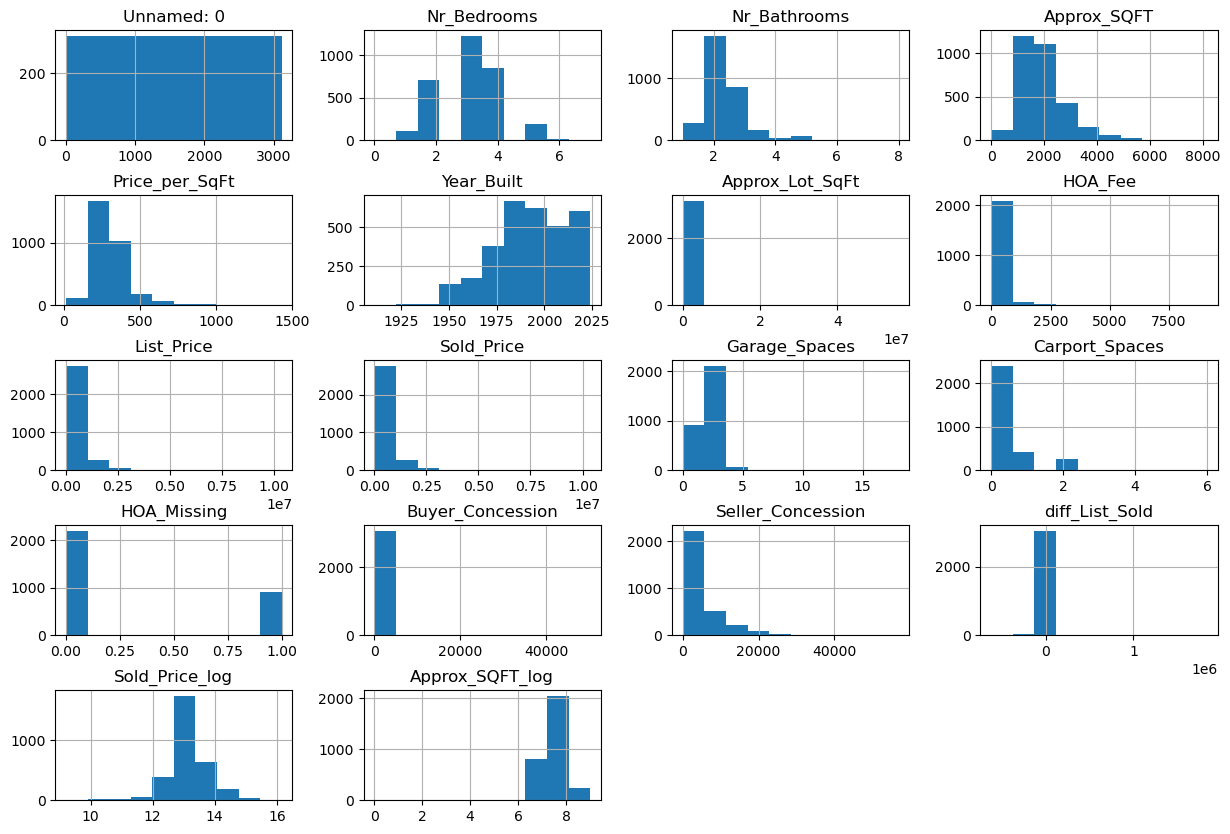

In [29]:
df.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

In [30]:
zipcode_means.index

Index(['85003', '85004', '85006', '85007', '85008', '85009', '85012', '85013',
       '85014', '85015', '85016', '85017', '85018', '85019', '85020', '85021',
       '85022', '85023', '85024', '85027', '85028', '85029', '85031', '85032',
       '85033', '85035', '85037', '85040', '85041', '85042', '85043', '85044',
       '85045', '85048', '85050', '85051', '85053', '85054', '85083', '85085',
       '85086', '85087', '85119', '85120', '85139', '85142', '85201', '85202',
       '85203', '85204', '85205', '85206', '85207', '85208', '85209', '85210',
       '85212', '85213', '85215', '85224', '85225', '85226', '85233', '85234',
       '85248', '85249', '85250', '85251', '85253', '85254', '85255', '85257',
       '85258', '85259', '85260', '85262', '85263', '85266', '85268', '85323',
       '85326', '85375', '85377', '85378', '85379', '85395', '85396', '85541'],
      dtype='object', name='Zip_Code')

**Explore the Data**

In [31]:
# Total square footage in Maricopa County
total_sqft = df['Approx_SQFT'].sum()
total_sqft

6074474

In [32]:
# total number of real estate properties
nr = len(df)
nr

3117

In [33]:
# mean sqft per house in Maricopa County
m_p_sqft = total_sqft/nr
m_p_sqft

1948.820660891883

In [34]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [35]:
# dropping all non-numerical columns

df = df.drop(['Dwelling_Type','Dwelling_Styles','Pool','Land_Lease_Fee','Clubhouse_Rec_Room','Basement','RV_Gate','Building_Style','Gated_Community','Workout_Facility','Loan_Type','Payment_Type'], axis=1, inplace=True)

In [36]:
df['Sold_Price'].value_counts()

TypeError: 'NoneType' object is not subscriptable

**Visualizing High Dimensional Data**

**scaling the data**

In [37]:
#Code task 1#
#Create a new dataframe, `df_scale` from `df` whilst setting the index to 'zipcode'
df_scale = df.set_index('Zip_Code')
#Save the zipcode labels (using the index attribute of `df_scale`) into the variable 'df_index'
df_index = df_scale.index
#Save the column names (using the `columns` attribute) of `df_scale` into the variable 'df_columns'
df_columns = df_scale.columns
df_scale.head()

AttributeError: 'NoneType' object has no attribute 'set_index'

In [38]:
df_scale.info()

NameError: name 'df_scale' is not defined

In [39]:
# dropping all non-numerical columns

df_scale = df_scale.drop(['Dwelling_Type','Dwelling_Styles','Pool','Land_Lease_Fee','Clubhouse_Rec_Room','Basement','RV_Gate','Building_Style','Gated_Community','Workout_Facility','Loan_Type','Payment_Type'], axis=1, inplace=True)

NameError: name 'df_scale' is not defined

In [40]:
df_scale.info()

NameError: name 'df_scale' is not defined

In [41]:
df_scale = scale(df_scale)

NameError: name 'df_scale' is not defined